### IMT 574 
July 14, 2022

Lab 3 solutions are pending - he will solve and upload 
Activity 4.2 is funky and not working 

Office Hours Sunday at 10 AM via Zoom 

In [72]:
#import library
import pandas as pd
import sklearn as sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
tips = pd.read_csv('/Users/jennyskytta/Downloads/tips.csv')
tips.head()

,Unnamed: 0,Card,Tip,Ad,Joke,None
0,1,None,1,0,0,1
1,2,Joke,1,0,1,0
2,3,Ad,0,1,0,0
3,4,None,0,0,0,1
4,5,None,1,0,0,1


In [74]:
tips.shape

(211, 6)

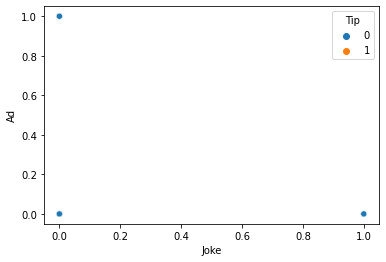

In [75]:
_=sns.scatterplot(x="Joke", y="Ad", hue="Tip", data=tips,
                 x_jitter=0.4, y_jitter=0.4)

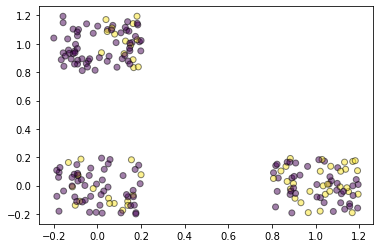

In [76]:
ad = tips.Ad + np.random.uniform(-0.2, 0.2, size=211)
joke=tips.Joke + np.random.uniform(-0.2, 0.2, size=211)
_=plt.scatter(joke, ad,c=tips.Tip, alpha=0.5, edgecolor="black")

In [77]:
tips.groupby(["Ad","Joke"]).Tip.mean()

Ad  Joke
0   0       0.246154
    1       0.416667
1   0       0.189189
Name: Tip, dtype: float64

In [78]:
from sklearn.tree import DecisionTreeClassifier 

m = DecisionTreeClassifier()

In [79]:
from sklearn.model_selection import cross_val_score
# cross validation 
y = tips.Tip
X = tips[["Joke", "Ad"]]
cv = cross_val_score(m, X, y, cv=10)
cv.mean()  # average of the cross validation accuracy 

0.7155844155844155

- start with everything and feed in 100% of cases 0.28 is prob of tipping
- pr(Tip) = 0.22 / 66% no joke | pr(tip) = 0.42 / 34% jokes 
- this is not classification / this is predicting probabilies 

In [80]:
_=m.fit(X,y)
yhat = m.predict(X)
yhat[:10]  # in these first 10 cases, no one is tipping 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
np.any(yhat > 0)

False

In [82]:
n = 800  # number of data points
sigma = 0.5  # random noise amplitude
##
x = np.random.normal(size=n)
y = np.random.normal(size=n)
X = np.column_stack((x,y))  # design matrix
alpha = np.arctan2(y, x)
r = np.sqrt(x**2 + y**2)
eps = np.random.normal(scale=sigma, size=n)
c = np.sin(alpha + r + eps)
# cut the sum of a sin and cosine into 4 parts
category = np.sign(c)
nCategories = len(np.unique(category))
y = category

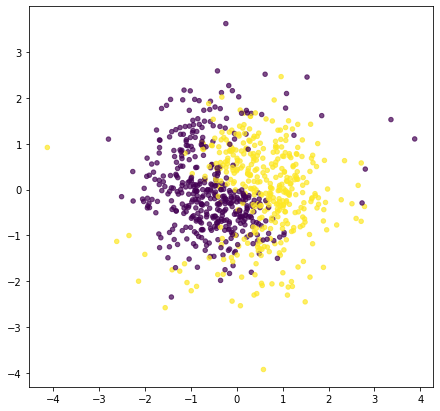

In [83]:
_ = plt.figure(figsize=(10, 7))
ax = plt.axes()
_ = ax.scatter(X[:,0], X[:,1], c=y, s=20, alpha=0.7)
_ = ax.set_aspect("equal")
_ = plt.show()

This is a tougher task for the model to come up with a good solution - the gold is mixed into the purple and vice versa so its messy for division 

In [84]:
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier()
_ = m.fit(X, y)
m.score(X, y)

1.0

In [85]:
## Decision boundary plot
def DBPlot(m, X, y, nGrid = 100, fName=None):
    """
    m: fitted sklearn model
    X: design matrix
    y: outcome vector
    nGrid: density of plot grid
    fname: if not None, save output to this file
    """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    phat = m.predict(XX)
    hatyy = phat.reshape(xx1.shape)
    plt.figure(figsize=(7,7))
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    if fName is not None:
        plt.savefig(fName)
    plt.show()

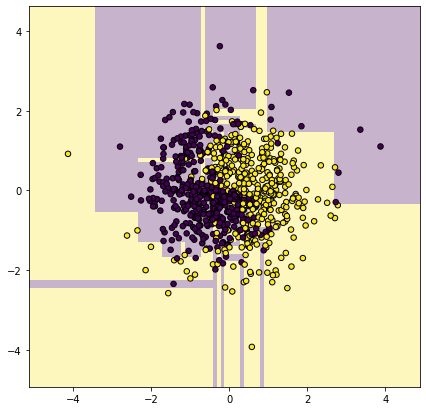

In [86]:
DBPlot(m,X,y)

In [87]:
m = DecisionTreeClassifier(max_depth=2)
_ = m.fit(X, y)
m.score(X, y)

0.79375

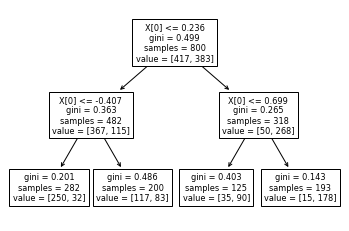

In [88]:
from sklearn.tree import plot_tree
_=plot_tree(m)

In [89]:
m = DecisionTreeClassifier(max_depth=2)
_ = m.fit(X, y)
m.score(X, y)

0.79375

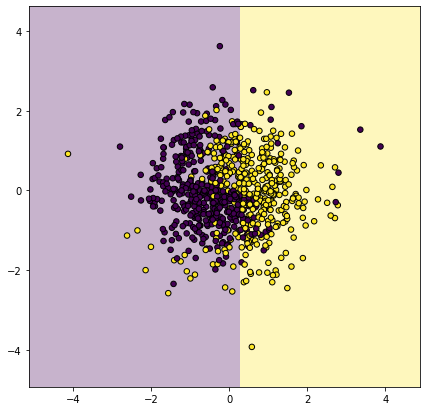

In [90]:
DBPlot(m, X, y)

In [94]:
m = DecisionTreeClassifier(max_depth=3)
_ = m.fit(X, y)
m.score(X, y)

0.8575

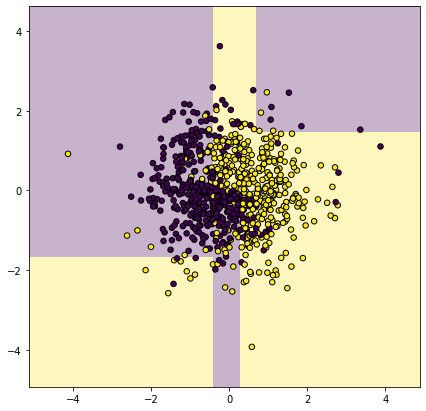

In [95]:
DBPlot(m, X, y)

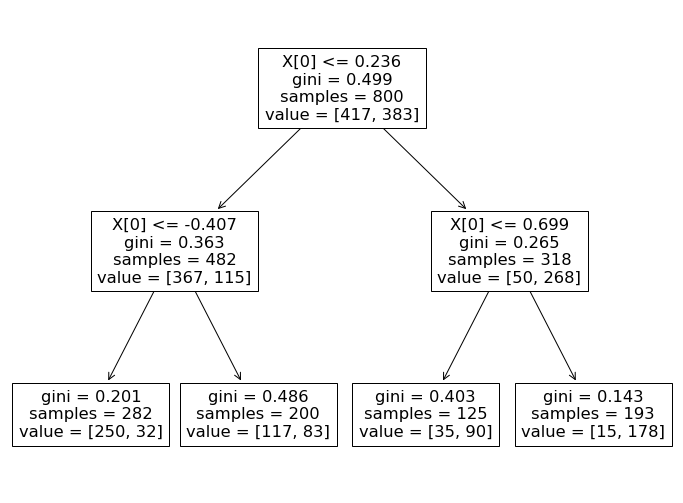

In [93]:
_ = plt.figure(figsize=(12,9))
_ = plot_tree(m)

In [96]:
m = DecisionTreeClassifier(max_depth=4)
_ = m.fit(X, y)
m.score(X, y)

0.88375

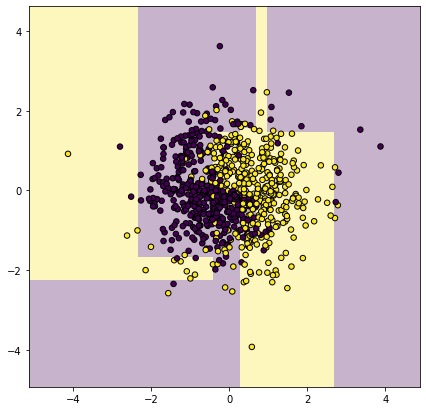

In [97]:
DBPlot(m, X, y)

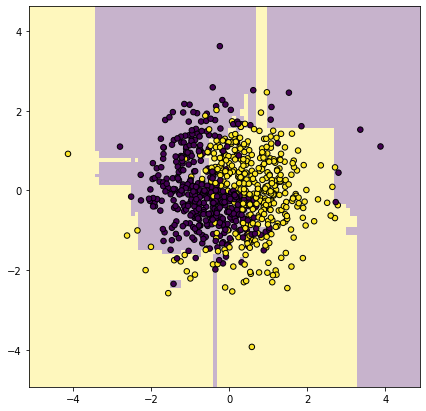

1.0

In [99]:
from sklearn.ensemble import BaggingClassifier

m = BaggingClassifier(n_estimators=100)
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

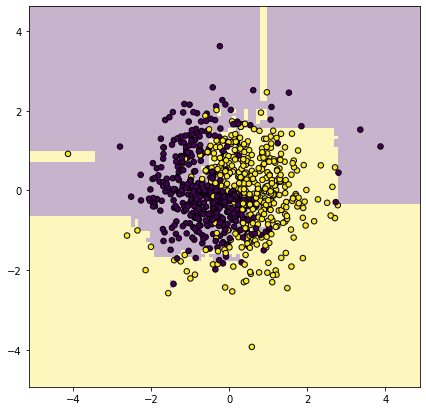

1.0

In [101]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=100)
_ = m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

In [102]:
m = RandomForestClassifier(n_estimators=100)
cross_val_score(m, X, y, cv=5).mean()

0.8275

In [103]:
m = BaggingClassifier(n_estimators=100)
cross_val_score(m, X, y, cv=5).mean()

0.8262499999999999

In [107]:
m = DecisionTreeClassifier(max_depth=4)
cross_val_score(m, X, y, cv=5).mean()

0.8300000000000001

### Regression Trees with Boston Data


In [119]:
boston = pd.read_csv("/Users/jennyskytta/Downloads/Boston.csv", sep=",")
boston.shape
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


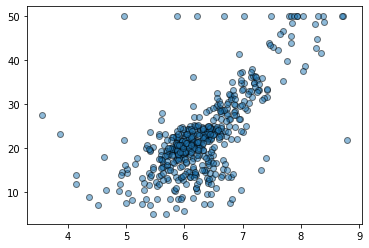

In [120]:
_ = plt.scatter(boston.rm, boston.medv, alpha=0.5, edgecolor="black")

In [123]:
from sklearn.tree import DecisionTreeRegressor

X = boston[["rm"]]  # must be 2-dimensional so uses double brackets 
y = boston.medv  # must be 1-dimensional
m = DecisionTreeRegressor()
_ = m.fit(X, y)

In [125]:
m.predict(np.array([[7]]))

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([33.4])

In [127]:
rm = np.linspace(3.5, 9, 100)
rm[:10]

array([3.5       , 3.55555556, 3.61111111, 3.66666667, 3.72222222,
       3.77777778, 3.83333333, 3.88888889, 3.94444444, 4.        ])

In [128]:
rm = np.linspace(3.5, 9, 100).reshape((-1,1))
rm.shape

(100, 1)

In [129]:
yhat = m.predict(rm)
yhat[:10]

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([27.5, 27.5, 27.5, 27.5, 23.1, 23.1, 23.1, 23.1, 23.1, 23.1])

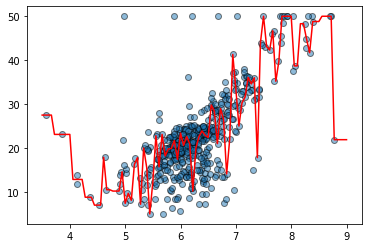

In [133]:
_ = plt.scatter(boston.rm, boston.medv, alpha=0.5, edgecolor="black")
_ = plt.plot(rm, yhat, color="red")

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


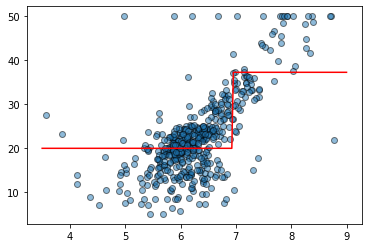

In [134]:
m = DecisionTreeRegressor(max_depth=1)
_ = m.fit(X, y)
rm = np.linspace(3.5, 9, 200).reshape((-1,1))
yhat = m.predict(rm)
_ = plt.scatter(boston.rm, boston.medv, alpha=0.5, edgecolor="black")
_ = plt.plot(rm, yhat, color="red")

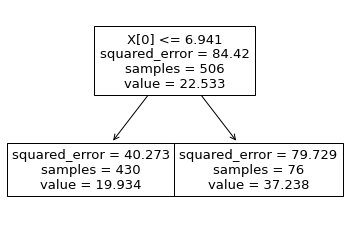

In [135]:
_ = plot_tree(m)

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


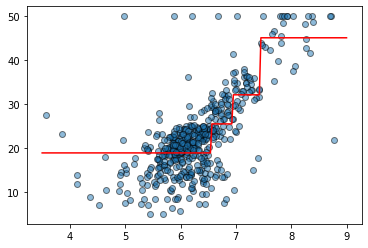

In [136]:
m = DecisionTreeRegressor(max_depth=2)
_ = m.fit(X, y)
rm = np.linspace(3.5, 9, 200).reshape((-1,1))
yhat = m.predict(rm)
_ = plt.scatter(boston.rm, boston.medv, alpha=0.5, edgecolor="black")
_ = plt.plot(rm, yhat, color="red")

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


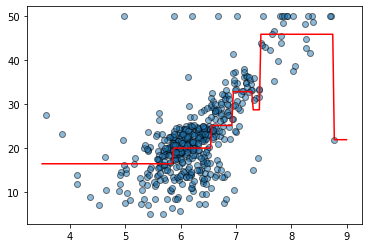

In [137]:
m = DecisionTreeRegressor(max_depth=3)
_ = m.fit(X, y)
rm = np.linspace(3.5, 9, 200).reshape((-1,1))
yhat = m.predict(rm)
_ = plt.scatter(boston.rm, boston.medv, alpha=0.5, edgecolor="black")
_ = plt.plot(rm, yhat, color="red")

- in case of classification we look at accuracy but in case of regression, we need R squared or RMSE or something to that degree.  We need a measure that takes into account that we will be pretty close but never totally true but its not measuring accuracy 